# Accidentes automovilisticos en Chicago

Este proyecto tiene como objetivo principal analizar y visualizar datos relacionados con accidentes automovilísticos con el fin de identificar patrones, causas comunes, zonas de alto riesgo y tendencias temporales. A través del uso de herramientas estadísticas y tecnológicas, se pretende generar información útil para la prevención de accidentes, la toma de decisiones por parte de las autoridades de tránsito y la concientización ciudadana.

El análisis se basa en un conjunto de datos históricos que incluye variables como la fecha y hora del accidente, condiciones climáticas, número de víctimas, causas probables del accidente, entre otras.

## Integrantes

* De la Torre Carreón Anahí
* Arias Reyes José Diego

> El primer paso es hacer la impotación de ElasticSearch para hacer uso de la base de datos NoSQL para realizar el analisis de la informacion recabada.
De igual manera colocar las librerias que seran utilizadas para leer los archivos y crear las graficas de dichas consultas.

In [154]:
from ElasticSearchProvider import ElasticSearchProvider
import json
import pandas as pd
import re
import matplotlib.pyplot as plt

> A continuación se anexan las variables fundamentales que se utilizan en este proyecto.

In [88]:
#Variables globales que seran utilizadas durante el proyecto
file_json_path = "Datos_Accidentes.json"
file_csv_path = "Traffic_Crashes_-_Crashes.csv"
mapping_json_path = "mapping.json"
name_index = "datos-accidentes-chicago"

## Archivo CSV sin modificaciones

> Le daremos un formato para que pueda ser legible y analizado para descubir información util sobre los accidentes de la cuidad de Chicago, aqui dejo la liga del catalogo del CSV [DATASET](https://catalog.data.gov/dataset/traffic-crashes-crashes)

CSV

CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
6c1659069e9c6285a650e70d6f9b574ed5f64c12888479093dfeef179c0344ec6d2057eae224b5c0d5dfc278c0a237f8c22543f07fdef2e4a95a3849871c9345,,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,,,,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654,,,,,,,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,12,6,8,,,
5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4106558b34b8a6d2b81af02cf91b576ecd7ced08ffd10fcfd940a84f7613125b89d33636e6075064e22,,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,,,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",2101,S,ASHLAND AVE,1235,,,,,,,4,NO INDICATION OF INJURY,0,0,0,0,0,1,0,14,7,7,41.854120263,-87.665902343,POINT (-87.665902342962 41.854120262952)
61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9cafd3dc7e631b9e1ba8b450a63af12bd90d1d2d9b127ea287f88d32e138a4eeba17799f536c08048934,,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,,,,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633,,,,,,,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,17,6,8,41.942975745,-87.761883497,POINT (-87.761883496974 41.942975745006)

> Le daremos formato ya que no se entiende con exactitudad ninguno de los valores.

## Cargar archivo CSV

> Como primer paso para cargar el archivo CSV utilizaremos la libreria Pandas para realizar dicha acción.

In [89]:
#Cargar los datos de un csv a un dataframe
df = pd.read_csv(file_csv_path)

## Formato al DataFrame

> Se eliminan del DataFrame una serie de columnas que no aportan valor directo al análisis que se va a realizar.

In [90]:
#Borrar las columnas que no nos hagan falta
df = df.drop(columns=["CRASH_DATE_EST_I","POSTED_SPEED_LIMIT","LANE_CNT","INTERSECTION_RELATED_I","NOT_RIGHT_OF_WAY_I","HIT_AND_RUN_I", "DATE_POLICE_NOTIFIED", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I", "DOORING_I", "WORK_ZONE_I", "WORK_ZONE_TYPE", "WORKERS_PRESENT_I", "INJURIES_UNKNOWN", "TRAFFIC_CONTROL_DEVICE","DEVICE_CONDITION","REPORT_TYPE","DAMAGE","STREET_NO","STREET_DIRECTION","BEAT_OF_OCCURRENCE","MOST_SEVERE_INJURY","INJURIES_TOTAL","INJURIES_NON_INCAPACITATING","INJURIES_REPORTED_NOT_EVIDENT","INJURIES_NO_INDICATION","CRASH_MONTH","LATITUDE","LONGITUDE","LOCATION","PRIM_CONTRIBUTORY_CAUSE"])

> Se le da formato a la columna "CRASH_DATE" a un formato de texto estándar "YYYY-MM-DD HH:MM:SS" dentro del DataFrame.

In [91]:
#Darle formato a la fecha del accidente
df["CRASH_DATE"] = pd.to_datetime(df["CRASH_DATE"], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')

> Todos aquellos campos que se encuentren vacios pero sean de tipo numerico se le colocara un 0 pero si son tipo texto se les colocara UNKNOWN.

In [92]:
# Columnas numéricas que deben ser float
columnas_float = [
    "INJURIES_FATAL",
    "INJURIES_INCAPACITATING"
]

# Convertir columnas float: reemplazar valores no numéricos por NaN y luego rellenar con 0
for col in columnas_float:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Para el resto de las columnas, reemplazar nulos o vacíos con "UNKNOWN"
for col in df.columns:
    if col not in columnas_float:
        df[col] = df[col].replace("", "UNKNOWN").fillna("UNKNOWN")

## Guardar DataFrame en un archivo json

> Convertimos el DataFrame en una lista de diccionarios para luego poder guardarla de manera correcta en un archivo json.

In [93]:
# Convertir el DataFrame a una lista de diccionarios
records = df.to_dict(orient="records")

# Guardar el JSON con formato de lista completa
with open(file_json_path, "w", encoding="utf-8") as f:
    json.dump(records, f, indent=2)

## Resultado del json

> Una vez formateado podemos hacer uso del json creado en base al CSV.

```json
{
    "CRASH_RECORD_ID": "6c1659069e9c6285a650e70d6f9b574ed5f64c12888479093dfeef179c0344ec6d2057eae224b5c0d5dfc278c0a237f8c22543f07fdef2e4a95a3849871c9345",
    "CRASH_DATE": "2023-08-18 12:50:00",
    "WEATHER_CONDITION": "CLEAR",
    "LIGHTING_CONDITION": "DAYLIGHT",
    "FIRST_CRASH_TYPE": "REAR END",
    "TRAFFICWAY_TYPE": "OTHER",
    "ALIGNMENT": "STRAIGHT AND LEVEL",
    "ROADWAY_SURFACE_COND": "DRY",
    "ROAD_DEFECT": "NO DEFECTS",
    "CRASH_TYPE": "INJURY AND / OR TOW DUE TO CRASH",
    "SEC_CONTRIBUTORY_CAUSE": "DISTRACTION - FROM INSIDE VEHICLE",
    "STREET_NAME": "OHARE ST",
    "NUM_UNITS": 2,
    "INJURIES_FATAL": 0.0,
    "INJURIES_INCAPACITATING": 0.0,
    "CRASH_HOUR": 12,
    "CRASH_DAY_OF_WEEK": 6
  }

## Checar conexión de ElasticSearch

> Mediante una función verificaremos si la conexión es exitosa o no con elasticsearch de igual manera verificar los indices que estan creados en nuestro ElasticSearch para verificar que no haya el indice que se creara en el siguiente paso.

In [157]:
# Verificar conexión de ElasticSearch
try:
    with ElasticSearchProvider(index=name_index) as es_handler:
        if es_handler.check_connection():
            print("Conexión exitosa de ElasticSearch")
        else:
            print("Error en la conexión de ElasticSearch")
        
        response = es_handler.show_indices()
        print(json.dumps(response, indent=2))
except Exception as e:
    print(f"Error {e}")

Conexión exitosa de ElasticSearch
{
  ".internal.alerts-transform.health.alerts-default-000001": {
    "aliases": {
      ".alerts-transform.health.alerts-default": {
        "is_write_index": true
      }
    }
  },
  ".slo-observability.sli-v3.3": {
    "aliases": {}
  },
  "my-index": {
    "aliases": {}
  },
  ".internal.alerts-ml.anomaly-detection.alerts-default-000001": {
    "aliases": {
      ".alerts-ml.anomaly-detection.alerts-default": {
        "is_write_index": true
      }
    }
  },
  "datos-accidentes-chicago": {
    "aliases": {}
  },
  ".internal.alerts-observability.slo.alerts-default-000001": {
    "aliases": {
      ".alerts-observability.slo.alerts-default": {
        "is_write_index": true
      }
    }
  },
  "prueba": {
    "aliases": {}
  },
  ".internal.alerts-observability.apm.alerts-default-000001": {
    "aliases": {
      ".alerts-observability.apm.alerts-default": {
        "is_write_index": true
      }
    }
  },
  ".internal.alerts-default.alerts-defa

c:\Users\xDiex\OneDrive\Documentos\Documentos\Ita\Octavo Semestre\BIGDATA\ElasticSearchProvider.py:46: ElasticsearchWarning: this request accesses system indices: [.apm-custom-link, .kibana_usage_counters_8.17.1_001, .kibana_analytics_8.17.1_001, .kibana_alerting_cases_8.17.1_001, .kibana_8.17.1_001, .kibana_task_manager_8.17.1_001, .apm-agent-configuration, .security-7, .kibana_security_solution_8.17.1_001, .kibana_ingest_8.17.1_001], but in a future major version, direct access to system indices will be prevented by default
  try:


> Función del constructor de la clase de ElasticSearchProvider donde le hacemos llegar el nombre del index, tambien colocamos el tiempo de espera del servidor para que haya más tiempo en cada solicitud.

In [158]:
def __init__(self,index):
        self.host = 'http://localhost:9200/'
        # self.user = stri{user}
        # self.password = str{password}
        self.index = index
        self.index_type = '_doc'
        self.connection = Elasticsearch(self.host,timeout=120,retry_on_timeout=True,max_retries=10)
        

> Comprobamos la conexión con la siguiente función.

In [ ]:
# Función para verificar la conexión de ElasticSearch
def check_connection(self):
    try:
        if self.connection.ping():
            return True
        else:
            return False
    except Exception as e:
        return{"StatusCode": 500,
        "body": json.dumps({
        "message": str(e),
        })}

> Función para mostrar todos los indices.

In [ ]:
#Muestra todos los indices existentes de ElasticSearch
def show_indices(self):
        try:
            response = self.connection.indices.get_alias(index="*").body
            return response
        except Exception as e:
            return{
                "StatusCode": 500,
                "body": json.dumps({
                    "message": str(e),
                }),
            }


## Creación de mapping

> Creamos la estructura que se le asignara al index que vayamos a crear para evitar errores en los datos.

``` json
{
  "mappings": {
    "properties": {
      "CRASH_RECORD_ID": { "type": "keyword" },
      "CRASH_DATE": { "type": "date", "format": "yyyy-MM-dd HH:mm:ss" },
      "WEATHER_CONDITION": { "type": "keyword" },
      "LIGHTING_CONDITION": { "type": "keyword" },
      "FIRST_CRASH_TYPE": { "type": "keyword" },
      "TRAFFICWAY_TYPE": { "type": "keyword" },
      "ALIGNMENT": { "type": "keyword" },
      "ROADWAY_SURFACE_COND": { "type": "keyword" },
      "ROAD_DEFECT": { "type": "keyword" },
      "CRASH_TYPE": { "type": "keyword" },
      "SEC_CONTRIBUTORY_CAUSE": { 
        "type": "keyword",
        "fields": {
          "keyword": {
            "type": "keyword"
          }
        }
      },
      "STREET_NAME": {
        "type": "text",
        "fields": {
          "keyword": {
            "type": "keyword"
          }
        }
      },
      "NUM_UNITS": { "type": "integer" },
      "INJURIES_FATAL": { "type": "float" },
      "INJURIES_INCAPACITATING": { "type": "float" },
      "CRASH_HOUR": { "type": "integer" },
      "CRASH_DAY_OF_WEEK": { "type": "integer" }
    }
  }
}


> Una vez creado el archivo json con el mapping se realizara el index cargando el mapping realizado.

## Crear index y cargar mapping

> Se creara nuestro index en el cual le cargaremos el mapping para despues mostrarlo para verificar que se hayan hecho correctamente la creación y carga de la estructura del index.

In [99]:
#Crear el indice en ElasticSearch e ingresar el mapping para dicho indice
try:
    with ElasticSearchProvider(index=name_index) as es:
        with open(mapping_json_path, "r") as j:
            mapping_data = json.load(j)
        response = es.create_index(mapping=mapping_data)
        print(response)
        response = es.get_mapping()
        print(response)
except Exception as e:
    print(f"Ocurrio un error: {e}") 

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'datos-accidentes-chicago'}
{'datos-accidentes-chicago': {'mappings': {'properties': {'ALIGNMENT': {'type': 'keyword'}, 'CRASH_DATE': {'type': 'date', 'format': 'yyyy-MM-dd HH:mm:ss'}, 'CRASH_DAY_OF_WEEK': {'type': 'integer'}, 'CRASH_HOUR': {'type': 'integer'}, 'CRASH_RECORD_ID': {'type': 'keyword'}, 'CRASH_TYPE': {'type': 'keyword'}, 'FIRST_CRASH_TYPE': {'type': 'keyword'}, 'INJURIES_FATAL': {'type': 'float'}, 'INJURIES_INCAPACITATING': {'type': 'float'}, 'LIGHTING_CONDITION': {'type': 'keyword'}, 'NUM_UNITS': {'type': 'integer'}, 'ROADWAY_SURFACE_COND': {'type': 'keyword'}, 'ROAD_DEFECT': {'type': 'keyword'}, 'SEC_CONTRIBUTORY_CAUSE': {'type': 'keyword', 'fields': {'keyword': {'type': 'keyword'}}}, 'STREET_NAME': {'type': 'text', 'fields': {'keyword': {'type': 'keyword'}}}, 'TRAFFICWAY_TYPE': {'type': 'keyword'}, 'WEATHER_CONDITION': {'type': 'keyword'}}}}}


> Función para crear el index

In [ ]:
 #Función para crear un nuevo indice
def create_index(self, mapping):
        try:
            if  not self.connection.indices.exists(index=self.index):
                response = self.connection.indices.create(index=self.index, body=mapping)
            else:
                response = {
                    "StatusCode": 409,
                    "body": json.dumps({
                        "message": f"Index {self.index} ya existe"
                    })
                }
            return response
        except Exception as e:
            return {
                "StatusCode": 500,
                "body": json.dumps({
                    "message": str(e)
                    })
            }

> Función para mostrar el mapeo del indice.

In [43]:
#Función para verificar el mapping del indice creado
def get_mapping(self):
        try:
            response = self.connection.indices.get_mapping(index=self.index)
            return response
        except Exception as e:
            return {
                "StatusCode": 500,
                "body": json.dumps({
                    "message": str(e)
                    })
            }

## Cargar el archivo json al índice de ElasticSearch

> El archivo json se cargara por grupos de 5000 documentos hasta cargar el número total de los datos.

In [100]:
#Cargar el archivo json con la data a elasticsearch
try:
    with ElasticSearchProvider(index=name_index) as es:
        with open(file_json_path, "r") as f:
            datos = json.load(f)
        response = es.insert_batch(datos=datos)
        print(response)
except Exception as e:
    print(f"Ocurrio un error {e}")

Grupo1, 5000 documentos insertados correctamente.
Grupo2, 5000 documentos insertados correctamente.
Grupo3, 5000 documentos insertados correctamente.
Grupo4, 5000 documentos insertados correctamente.
Grupo5, 5000 documentos insertados correctamente.
Grupo6, 5000 documentos insertados correctamente.
Grupo7, 5000 documentos insertados correctamente.
Grupo8, 5000 documentos insertados correctamente.
Grupo9, 5000 documentos insertados correctamente.
Grupo10, 5000 documentos insertados correctamente.
Grupo11, 5000 documentos insertados correctamente.
Grupo12, 5000 documentos insertados correctamente.
Grupo13, 5000 documentos insertados correctamente.
Grupo14, 5000 documentos insertados correctamente.
Grupo15, 5000 documentos insertados correctamente.
Grupo16, 5000 documentos insertados correctamente.
Grupo17, 5000 documentos insertados correctamente.
Grupo18, 5000 documentos insertados correctamente.
Grupo19, 5000 documentos insertados correctamente.
Grupo20, 5000 documentos insertados corr

> Función que prepara los datos para inserción masiva en Elasticsearch.
* Usa yield para que sea eficiente en memoria, inserta uno por uno.

In [ ]:
  #Función para insertar los documentos a elasticsearch
def insert_doc(self,datos):
        for doc in datos:
             yield{
                "_index": self.index,
                "_source": doc
            }

> Función para cargar en grupos de 5000 documentos a elasticsearch haciendo uso del método helpers.bulk para la inserción masiva de documentos.

In [55]:
#Función para guardar los documentos en grupos de 5000 para luego insertarlos a elasticsearch
def insert_batch(self, datos):
        try:
            batchsize = 5000
            total = len(datos)
            for i in range(0, total, batchsize):
                batch = datos[i:i+batchsize]
                acciones = list(self.insert_doc(batch))
                success, failed = helpers.bulk(self.connection, acciones, raise_on_error=False, stats_only=False)
                print(f"Grupo{i// batchsize+1}, {success} documentos insertados correctamente.")

                if failed:
                    print(f"{len(failed)} documentos fallaron al insertarse.")
                    for error in failed:
                        print(f"Error en documento: {error}")
            
            return {
                "StatusCode": 200,
                "body": json.dumps({
                    "message": f"{total} documentos insertados en Elasticsearch."
                })
            }
        except Exception as e:
            return {
                "StatusCode": 500,
                "body": json.dumps({
                    "message": str(e)
                })
            }

## Análisis de datos

> Haciendo uso de la información cargada en ElasticSearch vamos a realizar consultas de utilidad mostrando el resultado de manera visual para facilitar el analisis de los datos.

### Accidentes por cambio climático

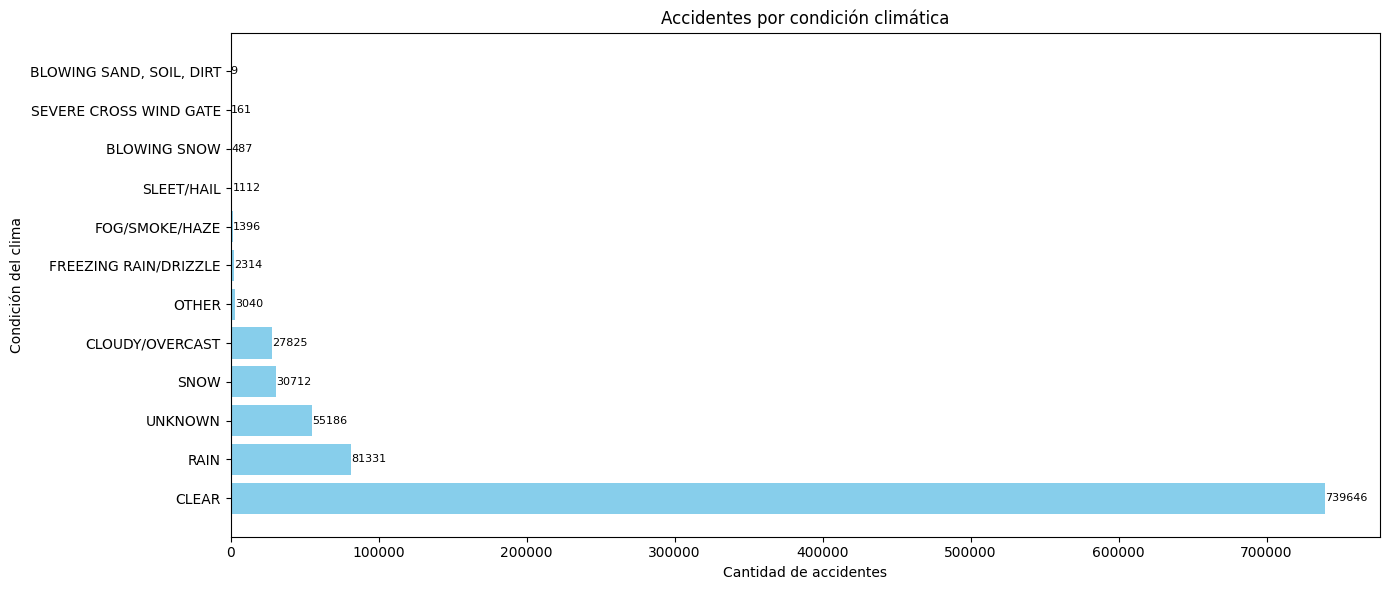

In [143]:
#Gráfica de accidentes en base al cambio climático
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body= {
            "size": 0,
            "aggs": {
                "WEATHER_CONDITION": {
                    "terms": {
                        "field": "WEATHER_CONDITION",
                        "size": 32
                    }
                }
            }
        })
        #print(json.dumps(response.body, indent=2))

        buckets = response["aggregations"]["WEATHER_CONDITION"]["buckets"]
        labels = [bucket["key"] for bucket in buckets]
        counts = [bucket["doc_count"] for bucket in buckets]

        plt.figure(figsize=(14, 6))
        bars = plt.barh(labels, counts, color='skyblue')
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Condición del clima")
        plt.title("Accidentes por condición climática")
        plt.tight_layout()
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 50, bar.get_y() + bar.get_height() / 2,
                     f'{int(width)}', va='center', fontsize=8)
        plt.show()
except Exception as e:
    print(f"Ocurrio un error: {e}")


### Cantidad de accidentes por año

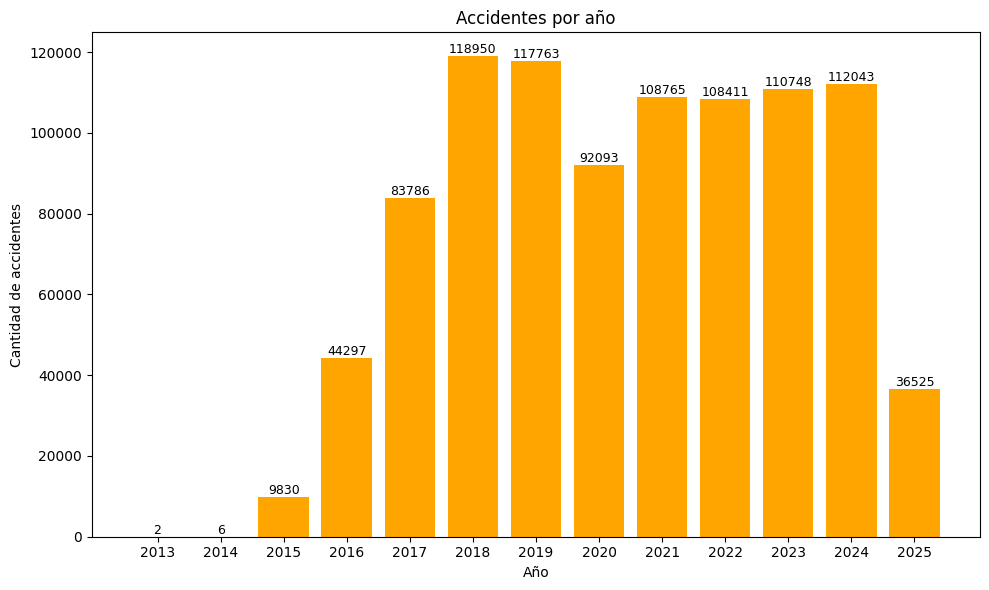

In [104]:
#Gráfica de cantidad de accidentes por año
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "aggs": {
                "accidentes_por_año": {
                    "date_histogram": {
                        "field": "CRASH_DATE",
                        "calendar_interval": "year",
                        "format": "yyyy"
                    }
                }
            }
        })

        # Extraer datos
        buckets = response.body["aggregations"]["accidentes_por_año"]["buckets"]
        años = [bucket["key_as_string"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]
        #print("Desglose de tipos de accidentes en 2018:")
        #for bucket in buckets:
         #   print(f"{bucket['key_as_string']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(10, 6))
        bars = plt.bar(años, conteos, color="orange")
        plt.xlabel("Año")
        plt.ylabel("Cantidad de accidentes")
        plt.title("Accidentes por año")
        plt.tight_layout()

        # Agregar etiquetas de cantidad encima de cada barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count),
                     ha='center', va='bottom', fontsize=9)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Tipo de accidentes en el año 2018

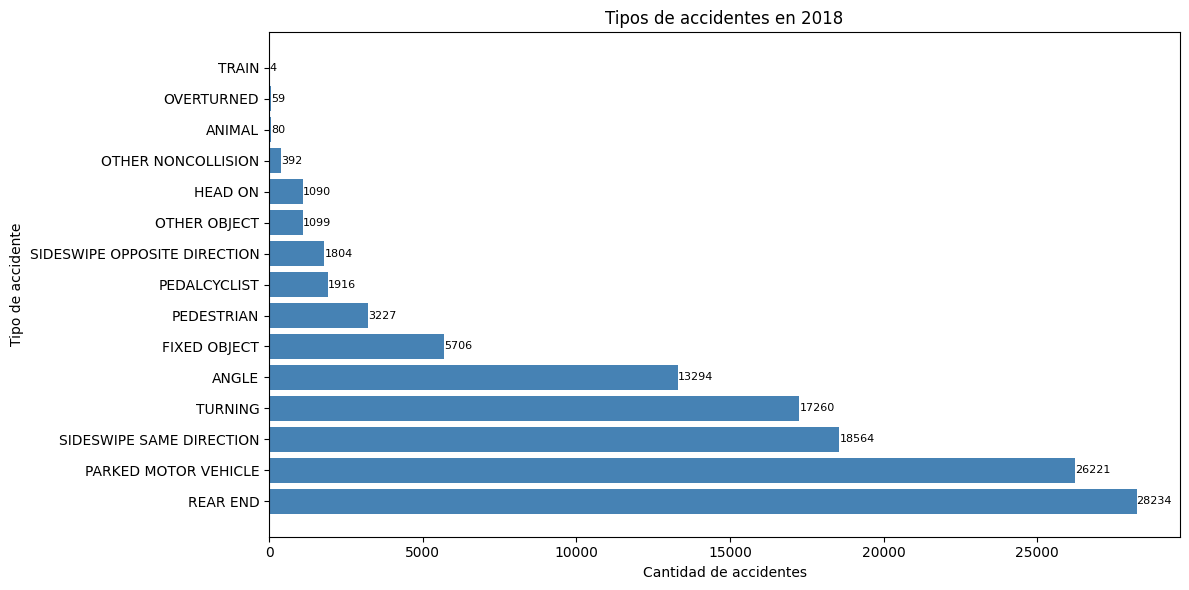

In [105]:
#Gráfica de tipos de accidentes en el año 2018
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "query": {
                "range": {
                    "CRASH_DATE": {
                        "gte": "2018-01-01",
                        "lte": "2018-12-31",
                        "format": "yyyy-MM-dd"
                    }
                }
            },
            "aggs": {
                "FIRST_CRASH_TYPE": {
                    "terms": {
                        "field": "FIRST_CRASH_TYPE",
                        "size": 30
                    }
                }
            }
        })

        # Extraer datos
        buckets = response.body["aggregations"]["FIRST_CRASH_TYPE"]["buckets"]
        tipos = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        #print("Desglose de tipos de accidentes en 2018:")
        #for bucket in buckets:
        #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(12, 6))
        bars = plt.barh(tipos, conteos, color="steelblue")
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Tipo de accidente")
        plt.title("Tipos de accidentes en 2018")
        plt.tight_layout()

        # Mostrar cantidad en la barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                     str(count), va="center", ha="left", fontsize=8)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Cantidad de accidentes por número de unidades de golpe trasero en el año 2018

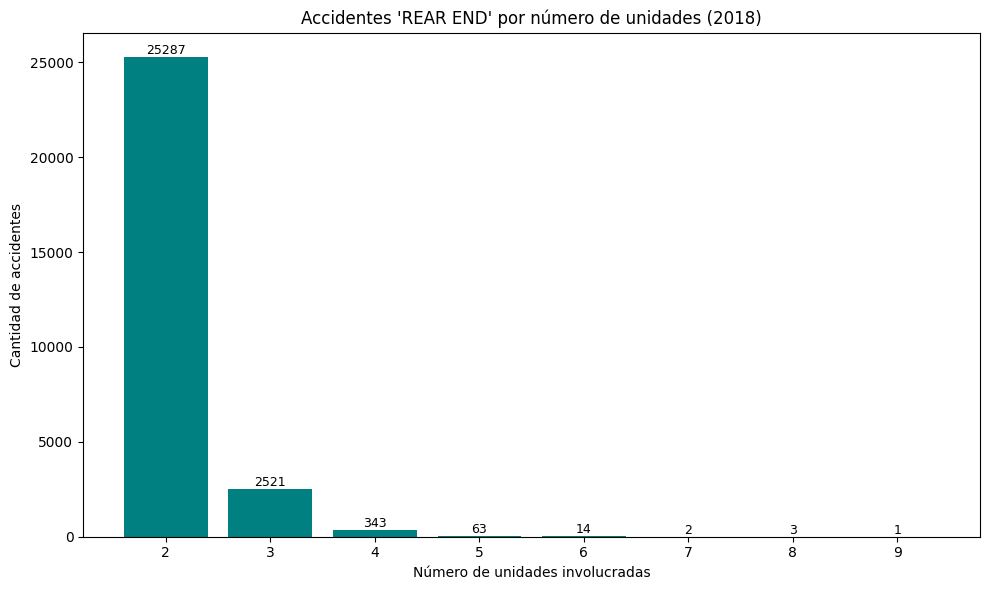

In [106]:
#Cantidad de accidentes por número de unidades de golpe trasero en el año 2018
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "query": {
                "bool": {
                    "must": [
                        {
                            "range": {
                                "CRASH_DATE": {
                                    "gte": "2018-01-01",
                                    "lte": "2018-12-31",
                                    "format": "yyyy-MM-dd"
                                }
                            }
                        },
                        {
                            "term": {
                                "FIRST_CRASH_TYPE": "REAR END"
                            }
                        }
                    ]
                }
            },
            "aggs": {
                "por_numero_de_unidades": {
                    "terms": {
                        "field": "NUM_UNITS",
                        "size": 20,
                        "order": { "_key": "asc" }
                    }
                }
            }
        })

        # Obtener resultados
        buckets = response.body["aggregations"]["por_numero_de_unidades"]["buckets"]

        # Imprimir desglose en consola
        # print("Desglose de accidentes 'REAR END' en 2018 por número de unidades:")
        # for bucket in buckets:
        #    print(f"{bucket['key']} unidades: {bucket['doc_count']} accidentes")

        # Graficar
        labels = [str(bucket["key"]) for bucket in buckets]
        counts = [bucket["doc_count"] for bucket in buckets]

        plt.figure(figsize=(10, 6))
        bars = plt.bar(labels, counts, color='teal')
        plt.xlabel("Número de unidades involucradas")
        plt.ylabel("Cantidad de accidentes")
        plt.title("Accidentes 'REAR END' por número de unidades (2018)")

        # Mostrar valores sobre las barras
        for bar, count in zip(bars, counts):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                     ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Cantidad de Lesionados de gravedad por número de unidades de golpe trasero en el año 2018

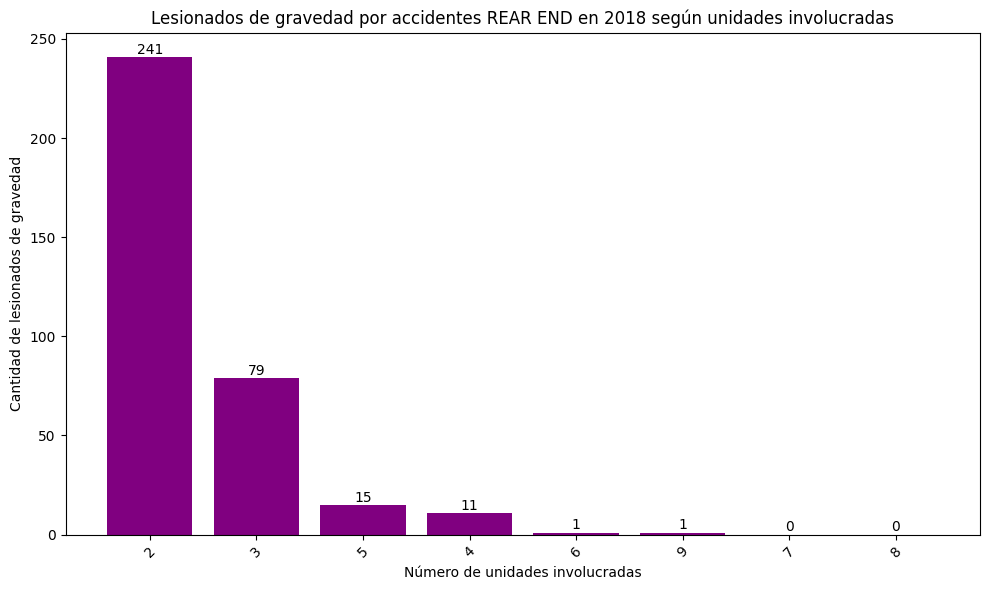

In [107]:
#Grafica de la cantidad de Lesionados de gravedad por número de unidades de golpe trasero en el año 2018
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "query": {
                "bool": {
                    "must": [
                        {
                            "range": {
                                "CRASH_DATE": {
                                    "gte": "2018-01-01",
                                    "lte": "2018-12-31",
                                    "format": "yyyy-MM-dd"
                                }
                            }
                        },
                        {
                            "term": {
                                "FIRST_CRASH_TYPE": "REAR END"
                            }
                        }
                    ]
                }
            },
            "aggs": {
                "NUM_UNITS": {
                    "terms": {
                        "field": "NUM_UNITS",
                        "size": 20,
                        "order": { "INJURIES_INCAPACITATING": "desc" }
                    },
                    "aggs": {
                        "INJURIES_INCAPACITATING": {
                            "sum": {
                                "field": "INJURIES_INCAPACITATING"
                            }
                        }
                    }
                }
            }
        })

        # Extraer los resultados
        buckets = response.body["aggregations"]["NUM_UNITS"]["buckets"]
        unidades = [str(bucket["key"]) for bucket in buckets]
        fallecidos = [int(bucket["INJURIES_INCAPACITATING"]["value"]) for bucket in buckets]

        # Mostrar por consola
        #print("Lesionados de gravedad por número de unidades (REAR END - 2018):")
        #for u, f in zip(unidades, fallecidos):
        #   print(f"Unidades: {u}, lesionados de gravedad: {f}")

        # Graficar
        plt.figure(figsize=(10, 6))
        bars = plt.bar(unidades, fallecidos, color="purple")
        plt.xlabel("Número de unidades involucradas")
        plt.ylabel("Cantidad de lesionados de gravedad")
        plt.title("Lesionados de gravedad por accidentes REAR END en 2018 según unidades involucradas")
        plt.xticks(rotation=45)

        # Etiquetas encima de cada barra
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Cantidad de fallecidos dependiendo de las unidades involucradas de tipo de golpe trasero en el año 2018

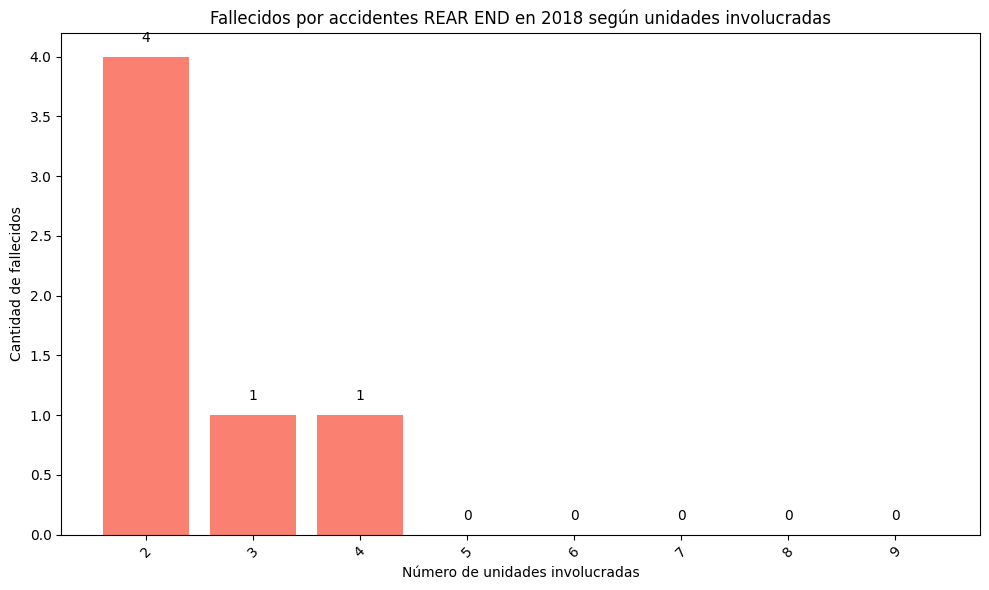

In [108]:
#Grafica de cantidad de fallecidos dependiendo de las unidades involucradas de tipo de golpe trasero en el año 2018
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "query": {
                "bool": {
                    "must": [
                        {
                            "range": {
                                "CRASH_DATE": {
                                    "gte": "2018-01-01",
                                    "lte": "2018-12-31",
                                    "format": "yyyy-MM-dd"
                                }
                            }
                        },
                        {
                            "term": {
                                "FIRST_CRASH_TYPE": "REAR END"
                            }
                        }
                    ]
                }
            },
            "aggs": {
                "NUM_UNITS": {
                    "terms": {
                        "field": "NUM_UNITS",
                        "size": 20,
                        "order": { "INJURIES_FATAL": "desc" }
                    },
                    "aggs": {
                        "INJURIES_FATAL": {
                            "sum": {
                                "field": "INJURIES_FATAL"
                            }
                        }
                    }
                }
            }
        })

        # Extraer los resultados
        buckets = response.body["aggregations"]["NUM_UNITS"]["buckets"]
        unidades = [str(bucket["key"]) for bucket in buckets]
        fallecidos = [int(bucket["INJURIES_FATAL"]["value"]) for bucket in buckets]

        # Mostrar por consola
        #print("Fallecidos por número de unidades (REAR END - 2018):")
        #for u, f in zip(unidades, fallecidos):
        #   print(f"Unidades: {u}, Fallecidos: {f}")

        # Graficar
        plt.figure(figsize=(10, 6))
        bars = plt.bar(unidades, fallecidos, color="salmon")
        plt.xlabel("Número de unidades involucradas")
        plt.ylabel("Cantidad de fallecidos")
        plt.title("Fallecidos por accidentes REAR END en 2018 según unidades involucradas")
        plt.xticks(rotation=45)

        # Etiquetas encima de cada barra
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")


### Número de accidentes por tipo de causa

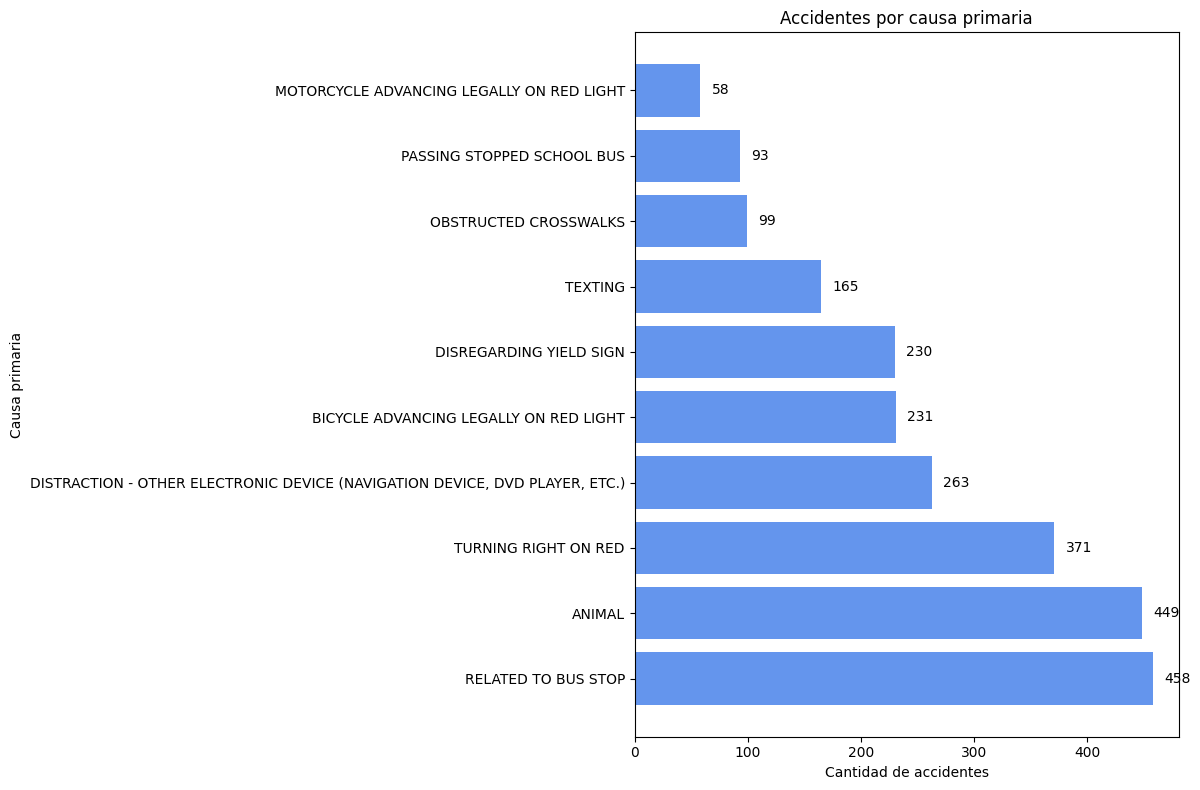

In [109]:
#Grafica del número de accidentes por tipo de causa

try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "aggs": {
                "SEC_CONTRIBUTORY_CAUSE": {
                    "terms": {
                        "field": "SEC_CONTRIBUTORY_CAUSE.keyword",
                        "size": 10,  # puedes aumentar el size si hay muchas causas
                        "order": { "_count": "asc" }
                    }
                }
            }
        })

        # Extraer datos
        buckets = response.body["aggregations"]["SEC_CONTRIBUTORY_CAUSE"]["buckets"]
        causas = [bucket["key"] for bucket in buckets]
        cantidades = [bucket["doc_count"] for bucket in buckets]

        # Mostrar por consola
        #print("Número de accidentes por causa:")
        #for c, q in zip(causas, cantidades):
        #    print(f"{c}: {q}")

        # Graficar
        plt.figure(figsize=(12, 8))
        bars = plt.barh(causas, cantidades, color='cornflowerblue')
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Causa primaria")
        plt.title("Accidentes por causa primaria")
        plt.gca().invert_yaxis()  # para mostrar la barra más grande arriba

        # Etiquetas sobre cada barra
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
                     str(width), va='center')

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Número de accidentes por condición de la vía

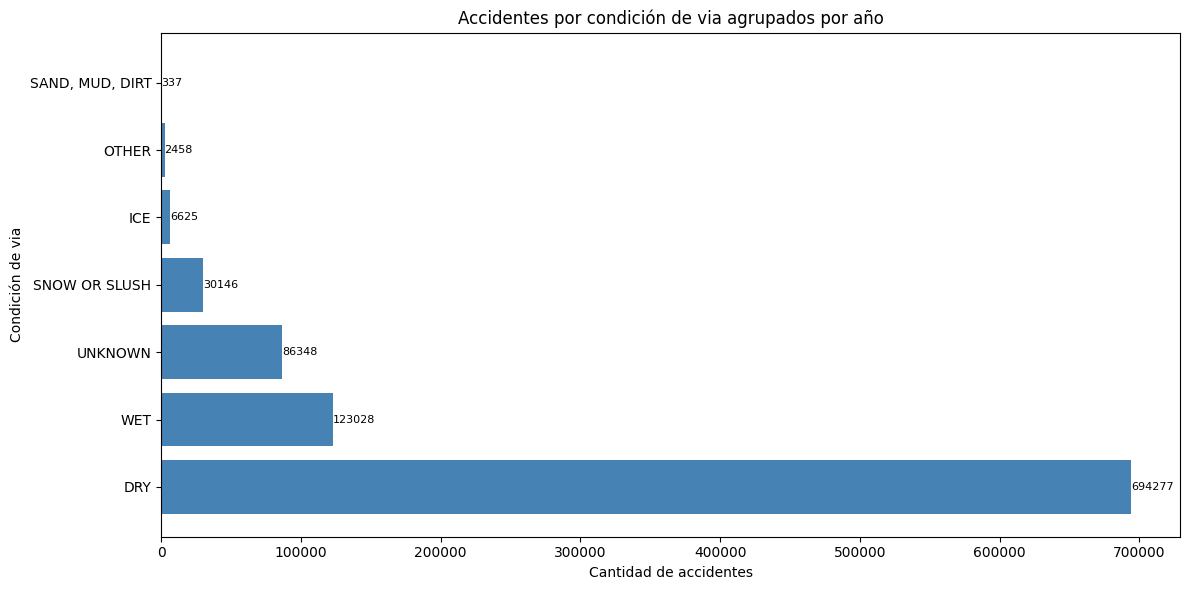

In [110]:
#Grafica del número de accidentes por condición de la vía
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "aggs": {
                "condiciones_via": {
                    "terms": {
                        "field": "ROADWAY_SURFACE_COND",
                        "size": 10
                    },
                    "aggs": {
                        "por_año": {
                            "date_histogram": {
                                "field": "CRASH_DATE",
                                "calendar_interval": "year",
                                "format": "yyyy"
                            }
                        }
                    }
                }
            }
        })
        #Extraer datos
        buckets = response.body["aggregations"]["condiciones_via"]["buckets"]
        tipos = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        # Imprimir desglose en consola
        #print("Desglose de accidentes por condición de via agrupados por año")
        #for bucket in buckets:
         #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(12, 6))
        bars = plt.barh(tipos, conteos, color="steelblue")
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Condición de via")
        plt.title("Accidentes por condición de via agrupados por año")
        plt.tight_layout()

        # Mostrar cantidad en la barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                     str(count), va="center", ha="left", fontsize=8)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Número de accidentes por defecto de la vía

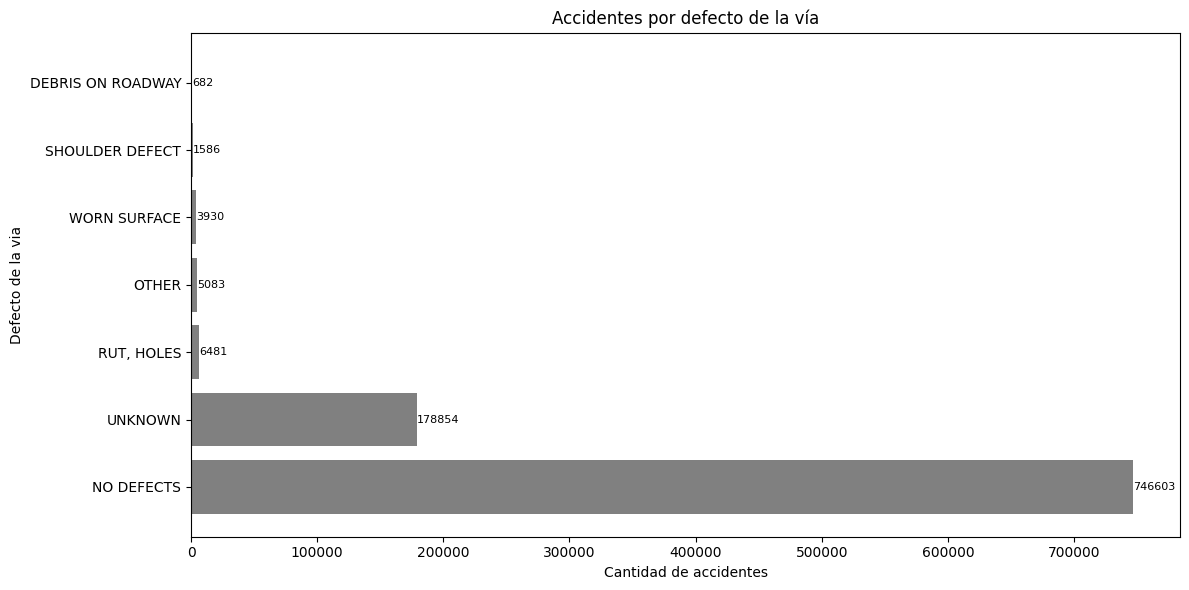

In [111]:
#Grafica del número de accidentes por defecto de la vía
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "aggs": {
                "defecto_via": {
                    "terms": {
                        "field": "ROAD_DEFECT",
                        "size": 10
                    }
                }
            }
        })
        #Extraer datos
        buckets = response.body["aggregations"]["defecto_via"]["buckets"]
        tipos = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        # Imprimir desglose en consola
        #print("Desglose de accidentes por defecto de la vía:")
        #for bucket in buckets:
        #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(12, 6))
        bars = plt.barh(tipos, conteos, color="gray")
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Defecto de la via")
        plt.title("Accidentes por defecto de la vía")
        plt.tight_layout()

        # Mostrar cantidad en la barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                     str(count), va="center", ha="left", fontsize=8)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Número de accidentes por iluminación de la vía

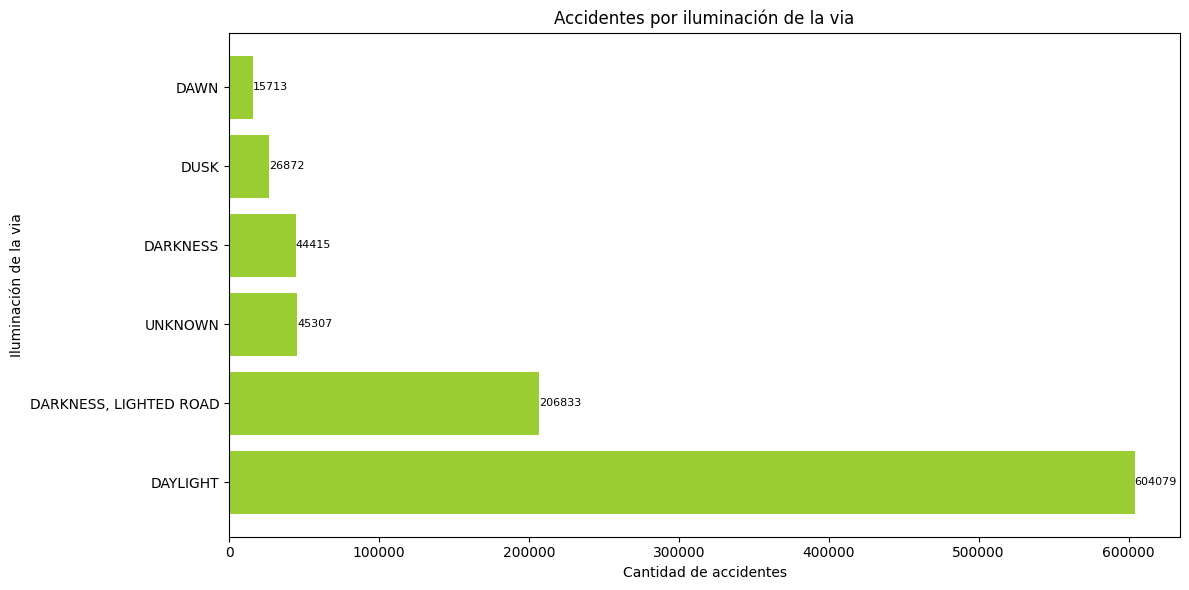

In [112]:
#Grafica del número de accidentes por iluminación de la vía
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "aggs": {
                "LIGHTING_CONDITION": {
                    "terms": {
                        "field": "LIGHTING_CONDITION",
                        "size": 10
                    }
                }
            }
        })
        #Extraer datos
        buckets = response.body["aggregations"]["LIGHTING_CONDITION"]["buckets"]
        tipos = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        # Imprimir desglose en consola
        #print("Desglose de accidentes por iluminación de la vía:")
        #for bucket in buckets:
        #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(12, 6))
        bars = plt.barh(tipos, conteos, color="yellowgreen")
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Iluminación de la via")
        plt.title("Accidentes por iluminación de la via")
        plt.tight_layout()

        # Mostrar cantidad en la barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                     str(count), va="center", ha="left", fontsize=8)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Número de accidentes entre las 7 am y 9 am.

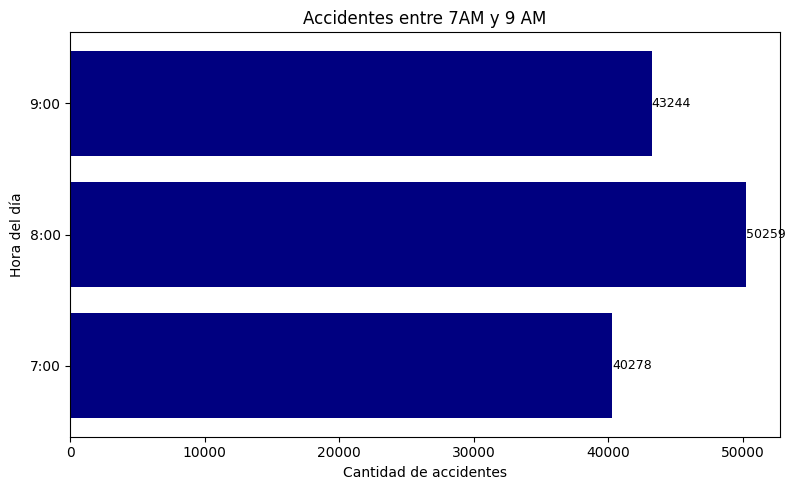

In [113]:
#Grafica del número de accidentes entre las 7 am y 9 am.
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "query": {
                "range": {
                    "CRASH_HOUR": {
                        "gte": 7,
                        "lte": 9
                    }
                }
            },
            "aggs": {
                "horas": {
                    "terms": {
                        "field": "CRASH_HOUR",
                        "size": 3,
                        "order": { "_key": "asc" }
                    }
                }
            }
        })

        # Extraer datos
        buckets = response.body["aggregations"]["horas"]["buckets"]
        tipos = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        # Imprimir desglose en consola
        #print("Desglose de accidentes entre 7AM y 9 AM:")
        #for bucket in buckets:
         #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(8, 5))
        bars = plt.barh([f"{h}:00" for h in tipos], conteos, color="navy")
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Hora del día")
        plt.title("Accidentes entre 7AM y 9 AM")
        plt.tight_layout()

        # Mostrar cantidad en la barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                     str(count), va="center", ha="left", fontsize=9)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Top 5 calles con mas accidentes

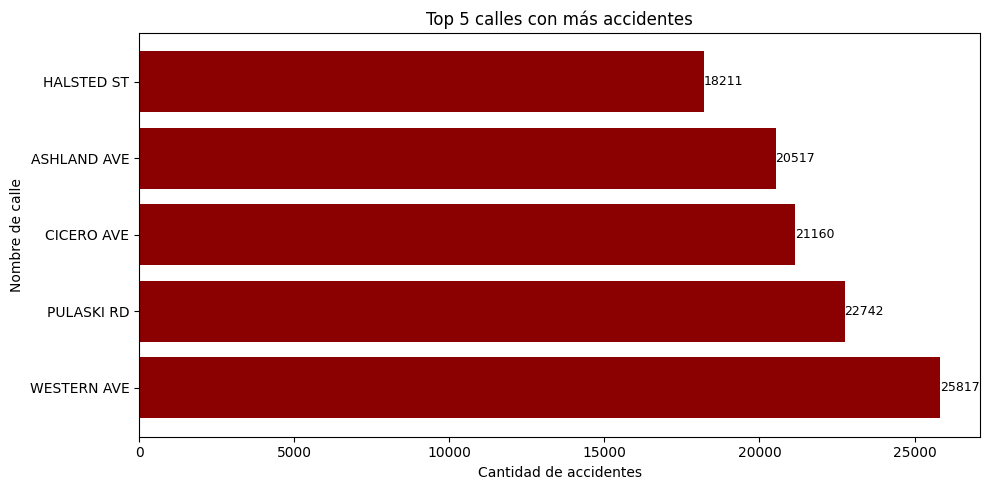

In [114]:
# Grafica de las 5 calles con mas accidentes. 
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "aggs": {
                "STREET_NAME": {
                    "terms": {
                        "field": "STREET_NAME.keyword",  # Asegúrate de usar el campo .keyword si STREET_NAME es texto
                        "size": 5,
                        
                    }
                }
            }
        })

        # Extraer datos
        buckets = response.body["aggregations"]["STREET_NAME"]["buckets"]
        calles = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        # Imprimir desglose en consola
        #print("Desglose del Top 5 calles con más accidentes:")
        #for bucket in buckets:
         #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(10, 5))
        bars = plt.barh(calles, conteos, color="darkred")
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Nombre de calle")
        plt.title("Top 5 calles con más accidentes")
        plt.tight_layout()

        # Mostrar cantidad en la barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                     str(count), va="center", ha="left", fontsize=9)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")


### Gravedad de los accidentes

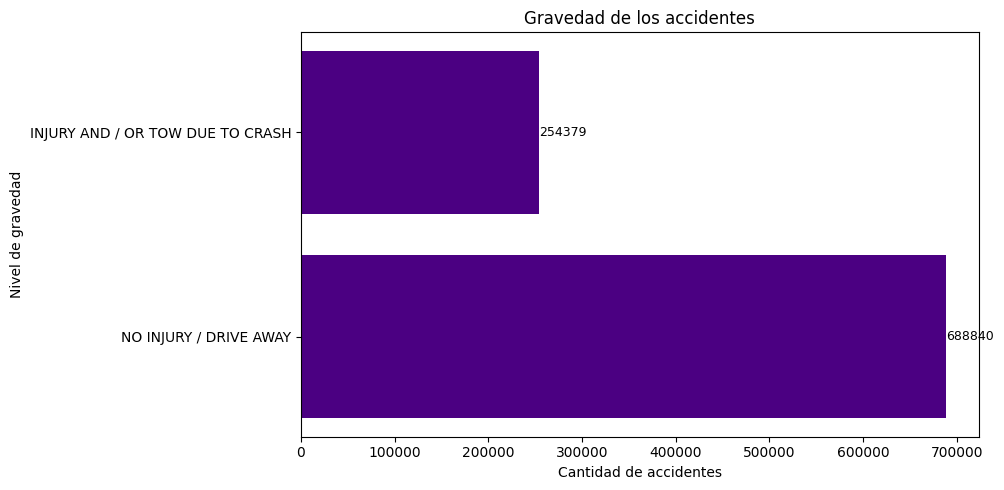

In [115]:
#Grafica de la gravedad de los accidentes
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "aggs": {
                "CRASH_TYPE": {
                    "terms": {
                        "field": "CRASH_TYPE",
                        "size": 10,
                        
                    }
                }
            }
        })

        # Extraer datos
        buckets = response.body["aggregations"]["CRASH_TYPE"]["buckets"]
        calles = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        # Imprimir desglose en consola
        #print("Desglose de la gravedad de los accidentes:")
        #for bucket in buckets:
         #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")


        # Graficar
        plt.figure(figsize=(10, 5))
        bars = plt.barh(calles, conteos, color="indigo")
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Nivel de gravedad")
        plt.title("Gravedad de los accidentes")
        plt.tight_layout()

        # Mostrar cantidad en la barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                     str(count), va="center", ha="left", fontsize=9)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Forma de la vía donde surgio el accidente

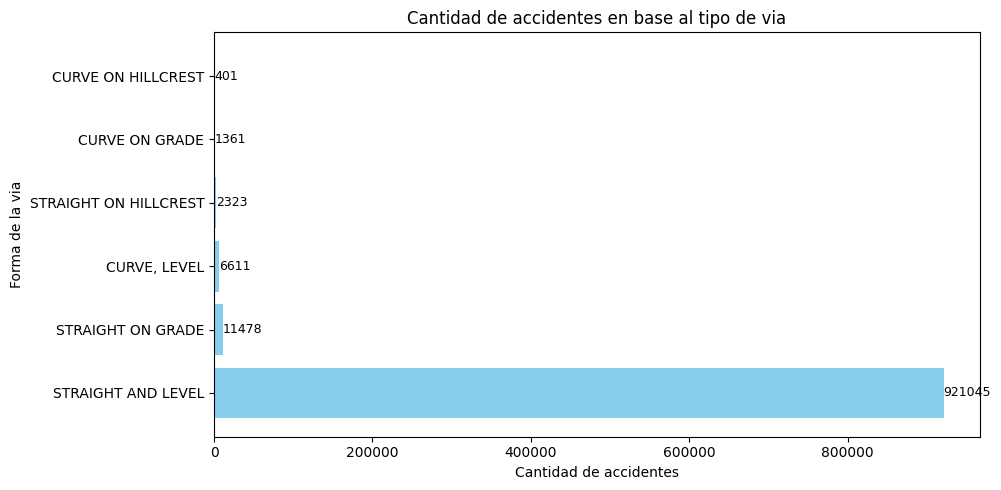

In [116]:
#Grafica de la forma de la vía donde surgio el accidente
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "aggs": {
                "ALIGNMENT": {
                    "terms": {
                        "field": "ALIGNMENT",  # Asegúrate de usar el campo .keyword si STREET_NAME es texto
                        "size": 10,
                        
                    }
                }
            }
        })

        # Extraer datos
        buckets = response.body["aggregations"]["ALIGNMENT"]["buckets"]
        calles = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        # Imprimir desglose en consola
        #print("Desglose de accidentes en base al tipo de via:")
        #for bucket in buckets:
         #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(10, 5))
        bars = plt.barh(calles, conteos, color="skyblue")
        plt.xlabel("Cantidad de accidentes")
        plt.ylabel("Forma de la via")
        plt.title("Cantidad de accidentes en base al tipo de via")
        plt.tight_layout()

        # Mostrar cantidad en la barra
        for bar, count in zip(bars, conteos):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                     str(count), va="center", ha="left", fontsize=9)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

### Accidentes del viernes al domingo

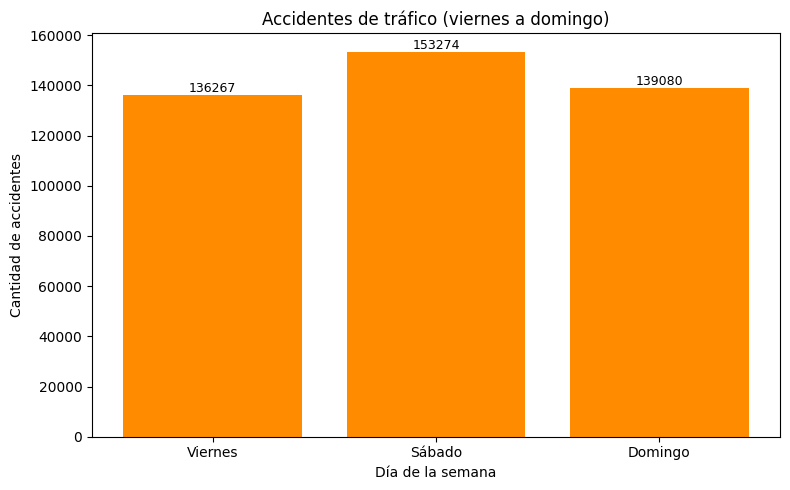

In [117]:
#Grafica sobre la cantidad de accidentes del viernes al domingo
try:
    with ElasticSearchProvider(index=name_index) as es:
        response = es.connection.search(index=name_index, body={
            "size": 0,
            "query": {
                "terms": {
                    "CRASH_DAY_OF_WEEK": [5, 6, 7]
                }
            },
            "aggs": {
                "CRASH_DAY_OF_WEEK": {
                    "terms": {
                        "field": "CRASH_DAY_OF_WEEK",
                        "size": 3,
                        "order": {
                            "_key": "asc"
                        }
                    }
                }
            }
        })

        buckets = response.body["aggregations"]["CRASH_DAY_OF_WEEK"]["buckets"]
        dias = [bucket["key"] for bucket in buckets]
        conteos = [bucket["doc_count"] for bucket in buckets]

        # Opcional: Mapeo de número a nombre de día
        nombres_dia = {5: "Viernes", 6: "Sábado", 7: "Domingo"}
        etiquetas = [nombres_dia.get(d, str(d)) for d in dias]

        # Imprimir desglose en consola
        #print("Desglose de accidentes de tráfico de viernes a domingo:")
        #for bucket in buckets:
         #   print(f"{bucket['key']}: {bucket['doc_count']} accidentes")

        # Graficar
        plt.figure(figsize=(8, 5))
        bars = plt.bar(etiquetas, conteos, color="darkorange")
        plt.xlabel("Día de la semana")
        plt.ylabel("Cantidad de accidentes")
        plt.title("Accidentes de tráfico (viernes a domingo)")
        plt.tight_layout()

        for bar, count in zip(bars, conteos):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     str(count), ha='center', va='bottom', fontsize=9)

        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

## Conclusión del proyecto

> Este proyecto permitió desarrollar un flujo completo para la carga, transformación y almacenamiento de datos de accidentes en la ciudad de Chicago en un motor de búsqueda Elasticsearch. Se logró automatizar el proceso de lectura de archivos JSON, el formateo de campos clave (como las fechas) y la inserción masiva de documentos mediante una clase personalizada que aprovecha la eficiencia del método bulk. 
A través del uso de generadores (yield), se garantizó un manejo óptimo de la memoria durante la carga de grandes volúmenes de datos. Además, se integró este flujo en un entorno Jupyter Notebook, permitiendo una visualización y depuración interactiva del proceso.
El proyecto demuestra una solución escalable y reutilizable para alimentar índices en Elasticsearch, lo cual es fundamental para habilitar consultas rápidas, visualizaciones en tiempo real y análisis exploratorio de datos estructurados.